In [1]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import sklearn

# Step 1: Find and download a dataset.

In [2]:
conflict = pd.read_csv("Project 1_Data.csv")

In [3]:
print(conflict.columns)

Index(['Country Name', 'Year',
       'Adjusted_net_national_income_per_capita__current_US__',
       'Death_rate__crude__per_1_000_people_', 'GDP__current_US__',
       'GDP_per_capita__current_US__', 'Military_expenditure__current_USD_',
       'Population_density__people_per_sq__km_of_land_area_',
       'Population__total', 'Rural_population', 'Urban_population',
       'Battle_related_deaths__number_of_people_'],
      dtype='object')


In [4]:
print(conflict.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13440 entries, 0 to 13439
Data columns (total 12 columns):
Country Name                                             13440 non-null object
Year                                                     13440 non-null int64
Adjusted_net_national_income_per_capita__current_US__    6909 non-null float64
Death_rate__crude__per_1_000_people_                     11975 non-null float64
GDP__current_US__                                        10040 non-null float64
GDP_per_capita__current_US__                             10037 non-null float64
Military_expenditure__current_USD_                       7448 non-null float64
Population_density__people_per_sq__km_of_land_area_      12568 non-null float64
Population__total                                        13108 non-null float64
Rural_population                                         12990 non-null float64
Urban_population                                         12990 non-null float64
Battle_related_d

# Step 2: Divide into a training set and a testing set. 

I'm stratifying my split based on GDP.

In [5]:
conflict["GDP_cat"] = np.ceil(conflict["GDP__current_US__"] / 1.5) 
conflict["GDP_cat"].where(conflict["GDP_cat"] < 5, 5.0, inplace=True)

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.33, random_state=42) 
for train_index, test_index in split.split(conflict, conflict["GDP_cat"]):    
    strat_train_set = conflict.loc[train_index]    
    strat_test_set = conflict.loc[test_index]

In [7]:
conflict["GDP_cat"].value_counts() / len(conflict)

5.0    1.0
Name: GDP_cat, dtype: float64

In [8]:
for set in (strat_train_set, strat_test_set):
    set.drop(["GDP_cat"], axis=1, inplace=True)

In [9]:
conflict_train = strat_train_set

In [10]:
conflict_train.head()

,Country Name,Year,Adjusted_net_national_income_per_capita__current_US__,Death_rate__crude__per_1_000_people_,GDP__current_US__,GDP_per_capita__current_US__,Military_expenditure__current_USD_,Population_density__people_per_sq__km_of_land_area_,Population__total,Rural_population,Urban_population,Battle_related_deaths__number_of_people_
7150,Lithuania,1970,NaN,8.900,NaN,NaN,NaN,50.090763,3139689.0,1583816.0,1555873.0,0
8731,New Zealand,1991,9455.013339,8.000,4.274533e+10,12230.073450,9.890338e+08,13.273708,3495100.0,526013.0,2969087.0,0
5598,India,1978,185.336143,13.892,1.370000e+11,205.693386,3.975819e+09,224.506273,667499806.0,518120024.0,149379782.0,0
1950,Cabo Verde,1990,752.081703,8.483,3.068911e+08,908.096190,NaN,83.858561,337950.0,188846.0,149104.0,0
4756,Greece,1976,3125.278722,8.900,3.115284e+10,3390.545484,1.559887e+09,71.281226,9188150.0,2992672.0,6195478.0,0


In [11]:
conflict_train.shape

(9004, 12)

# Step 3: Explore your training set.

In [12]:
conflict_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9004 entries, 7150 to 12354
Data columns (total 12 columns):
Country Name                                             9004 non-null object
Year                                                     9004 non-null int64
Adjusted_net_national_income_per_capita__current_US__    4605 non-null float64
Death_rate__crude__per_1_000_people_                     8006 non-null float64
GDP__current_US__                                        6706 non-null float64
GDP_per_capita__current_US__                             6704 non-null float64
Military_expenditure__current_USD_                       4999 non-null float64
Population_density__people_per_sq__km_of_land_area_      8421 non-null float64
Population__total                                        8774 non-null float64
Rural_population                                         8700 non-null float64
Urban_population                                         8700 non-null float64
Battle_related_deaths__

In [13]:
print(conflict_train.describe())

              Year  Adjusted_net_national_income_per_capita__current_US__  \
count  9004.000000                                        4605.000000       
mean   1989.442137                                        6412.119733       
std      17.394741                                       10547.522254       
min    1960.000000                                         -37.489742       
25%    1974.000000                                         590.699182       
50%    1989.000000                                        1930.880875       
75%    2005.000000                                        6810.924560       
max    2019.000000                                       82487.467830       

       Death_rate__crude__per_1_000_people_  GDP__current_US__  \
count                           8006.000000       6.706000e+03   
mean                              10.524555       3.951974e+11   
std                                5.328557       2.609610e+12   
min                                1.12700

# Step 4a: Clean your train set

In [14]:
print(conflict_train.dtypes)

Country Name                                              object
Year                                                       int64
Adjusted_net_national_income_per_capita__current_US__    float64
Death_rate__crude__per_1_000_people_                     float64
GDP__current_US__                                        float64
GDP_per_capita__current_US__                             float64
Military_expenditure__current_USD_                       float64
Population_density__people_per_sq__km_of_land_area_      float64
Population__total                                        float64
Rural_population                                         float64
Urban_population                                         float64
Battle_related_deaths__number_of_people_                   int64
dtype: object


I'm separating my data by types - categorical and continuous - so that I can clean each variable properly, either One Hot Encoding or Imputing with the mean.

In [15]:
conflict_train["Year"] = conflict_train["Year"].astype("object")

In [16]:
print(conflict_train.dtypes)

Country Name                                              object
Year                                                      object
Adjusted_net_national_income_per_capita__current_US__    float64
Death_rate__crude__per_1_000_people_                     float64
GDP__current_US__                                        float64
GDP_per_capita__current_US__                             float64
Military_expenditure__current_USD_                       float64
Population_density__people_per_sq__km_of_land_area_      float64
Population__total                                        float64
Rural_population                                         float64
Urban_population                                         float64
Battle_related_deaths__number_of_people_                   int64
dtype: object


In [17]:
print(conflict_train.isnull().sum())

Country Name                                                0
Year                                                        0
Adjusted_net_national_income_per_capita__current_US__    4399
Death_rate__crude__per_1_000_people_                      998
GDP__current_US__                                        2298
GDP_per_capita__current_US__                             2300
Military_expenditure__current_USD_                       4005
Population_density__people_per_sq__km_of_land_area_       583
Population__total                                         230
Rural_population                                          304
Urban_population                                          304
Battle_related_deaths__number_of_people_                    0
dtype: int64


Encoding categorical variables Country Name and Year.

In [18]:
countryname_enc = pd.get_dummies(conflict_train["Country Name"])

In [19]:
print(countryname_enc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9004 entries, 7150 to 12354
Columns: 224 entries, Afghanistan to Zimbabwe
dtypes: uint8(224)
memory usage: 2.0 MB
None


In [20]:
year_enc = pd.get_dummies(conflict_train["Year"])

In [21]:
print(year_enc.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9004 entries, 7150 to 12354
Data columns (total 60 columns):
1960    9004 non-null uint8
1961    9004 non-null uint8
1962    9004 non-null uint8
1963    9004 non-null uint8
1964    9004 non-null uint8
1965    9004 non-null uint8
1966    9004 non-null uint8
1967    9004 non-null uint8
1968    9004 non-null uint8
1969    9004 non-null uint8
1970    9004 non-null uint8
1971    9004 non-null uint8
1972    9004 non-null uint8
1973    9004 non-null uint8
1974    9004 non-null uint8
1975    9004 non-null uint8
1976    9004 non-null uint8
1977    9004 non-null uint8
1978    9004 non-null uint8
1979    9004 non-null uint8
1980    9004 non-null uint8
1981    9004 non-null uint8
1982    9004 non-null uint8
1983    9004 non-null uint8
1984    9004 non-null uint8
1985    9004 non-null uint8
1986    9004 non-null uint8
1987    9004 non-null uint8
1988    9004 non-null uint8
1989    9004 non-null uint8
1990    9004 non-null uint8
1991    9004 non-null

Imputing Mean values for Nulls in continuous variables.

In [22]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="mean")

C:\Python\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
conflict_num = conflict_train.drop("Country Name", axis=1)

In [24]:
conflict_num = conflict_num.drop("Year", axis=1)

In [25]:
conflict_num.shape

(9004, 10)

In [26]:
conflict_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9004 entries, 7150 to 12354
Data columns (total 10 columns):
Adjusted_net_national_income_per_capita__current_US__    4605 non-null float64
Death_rate__crude__per_1_000_people_                     8006 non-null float64
GDP__current_US__                                        6706 non-null float64
GDP_per_capita__current_US__                             6704 non-null float64
Military_expenditure__current_USD_                       4999 non-null float64
Population_density__people_per_sq__km_of_land_area_      8421 non-null float64
Population__total                                        8774 non-null float64
Rural_population                                         8700 non-null float64
Urban_population                                         8700 non-null float64
Battle_related_deaths__number_of_people_                 9004 non-null int64
dtypes: float64(9), int64(1)
memory usage: 773.8 KB


In [27]:
imputer.fit(conflict_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [28]:
imputer.statistics_

array([6.41211973e+03, 1.05245555e+01, 3.95197405e+11, 8.50816030e+03,
       1.39864673e+10, 3.24387151e+02, 3.20787284e+07, 1.53262563e+07,
       1.70185128e+07, 1.18055309e+02])

In [29]:
conflict_num.mean().values

array([6.41211973e+03, 1.05245555e+01, 3.95197405e+11, 8.50816030e+03,
       1.39864673e+10, 3.24387151e+02, 3.20787284e+07, 1.53262563e+07,
       1.70185128e+07, 1.18055309e+02])

In [30]:
X = imputer.transform(conflict_num)

In [31]:
conflict_train2 = pd.DataFrame(X, columns=conflict_num.columns)

In [32]:
conflict_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9004 entries, 0 to 9003
Data columns (total 10 columns):
Adjusted_net_national_income_per_capita__current_US__    9004 non-null float64
Death_rate__crude__per_1_000_people_                     9004 non-null float64
GDP__current_US__                                        9004 non-null float64
GDP_per_capita__current_US__                             9004 non-null float64
Military_expenditure__current_USD_                       9004 non-null float64
Population_density__people_per_sq__km_of_land_area_      9004 non-null float64
Population__total                                        9004 non-null float64
Rural_population                                         9004 non-null float64
Urban_population                                         9004 non-null float64
Battle_related_deaths__number_of_people_                 9004 non-null float64
dtypes: float64(10)
memory usage: 703.6 KB


In [33]:
print(conflict_train2.isnull().sum())

Adjusted_net_national_income_per_capita__current_US__    0
Death_rate__crude__per_1_000_people_                     0
GDP__current_US__                                        0
GDP_per_capita__current_US__                             0
Military_expenditure__current_USD_                       0
Population_density__people_per_sq__km_of_land_area_      0
Population__total                                        0
Rural_population                                         0
Urban_population                                         0
Battle_related_deaths__number_of_people_                 0
dtype: int64


Concatenating the three dataframes: country name, year, conflict_tr. I reset their indexes below because NAs are introduced, otherwise.

In [34]:
countryname_enc.reset_index(drop=True, inplace=True)
year_enc.reset_index(drop=True, inplace=True)
conflict_train2.reset_index(drop=True, inplace=True)

In [35]:
countryname_enc.shape

(9004, 224)

In [36]:
year_enc.shape

(9004, 60)

In [37]:
conflict_train2.shape

(9004, 10)

In [38]:
finalconflicttrain = countryname_enc.join(year_enc, on=None, how='left', lsuffix='', rsuffix='', sort=False)

In [39]:
conflict_train3 = finalconflicttrain.join(conflict_train2, on=None, how='left', lsuffix='', rsuffix='', sort=False)

In [40]:
conflict_train3.shape

(9004, 294)

In [41]:
print(conflict_train3.columns)

Index([                                          'Afghanistan',
                                                     'Albania',
                                                     'Algeria',
                                              'American Samoa',
                                                     'Andorra',
                                                      'Angola',
                                         'Antigua and Barbuda',
                                                   'Argentina',
                                                     'Armenia',
                                                       'Aruba',
       ...
       'Adjusted_net_national_income_per_capita__current_US__',
                        'Death_rate__crude__per_1_000_people_',
                                           'GDP__current_US__',
                                'GDP_per_capita__current_US__',
                          'Military_expenditure__current_USD_',
         'Population_density_

In [42]:
print(conflict_train3.isnull().sum())

Afghanistan                                            0
Albania                                                0
Algeria                                                0
American Samoa                                         0
Andorra                                                0
                                                      ..
Population_density__people_per_sq__km_of_land_area_    0
Population__total                                      0
Rural_population                                       0
Urban_population                                       0
Battle_related_deaths__number_of_people_               0
Length: 294, dtype: int64


My train set, conflict_train3 is all clean and properly encoded. Now, I do the same thing with my test set.

# Step 4b: Clean your test set. 

In [43]:
conflict_test = strat_test_set

In [44]:
print(conflict_test.dtypes)

Country Name                                              object
Year                                                       int64
Adjusted_net_national_income_per_capita__current_US__    float64
Death_rate__crude__per_1_000_people_                     float64
GDP__current_US__                                        float64
GDP_per_capita__current_US__                             float64
Military_expenditure__current_USD_                       float64
Population_density__people_per_sq__km_of_land_area_      float64
Population__total                                        float64
Rural_population                                         float64
Urban_population                                         float64
Battle_related_deaths__number_of_people_                   int64
dtype: object


In [45]:
conflict_test["Year"] = conflict_test["Year"].astype("object")

In [46]:
print(conflict_test.dtypes)

Country Name                                              object
Year                                                      object
Adjusted_net_national_income_per_capita__current_US__    float64
Death_rate__crude__per_1_000_people_                     float64
GDP__current_US__                                        float64
GDP_per_capita__current_US__                             float64
Military_expenditure__current_USD_                       float64
Population_density__people_per_sq__km_of_land_area_      float64
Population__total                                        float64
Rural_population                                         float64
Urban_population                                         float64
Battle_related_deaths__number_of_people_                   int64
dtype: object


In [47]:
print(conflict_test.isnull().sum())

Country Name                                                0
Year                                                        0
Adjusted_net_national_income_per_capita__current_US__    2132
Death_rate__crude__per_1_000_people_                      467
GDP__current_US__                                        1102
GDP_per_capita__current_US__                             1103
Military_expenditure__current_USD_                       1987
Population_density__people_per_sq__km_of_land_area_       289
Population__total                                         102
Rural_population                                          146
Urban_population                                          146
Battle_related_deaths__number_of_people_                    0
dtype: int64


Encoding categorical variables Country Name and Year.

In [48]:
countryname_enc2 = pd.get_dummies(conflict_test["Country Name"])

In [49]:
print(countryname_enc2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4436 entries, 3579 to 12645
Columns: 224 entries, Afghanistan to Zimbabwe
dtypes: uint8(224)
memory usage: 1005.0 KB
None


In [50]:
year_enc2 = pd.get_dummies(conflict_test["Year"])

In [51]:
print(year_enc2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4436 entries, 3579 to 12645
Data columns (total 60 columns):
1960    4436 non-null uint8
1961    4436 non-null uint8
1962    4436 non-null uint8
1963    4436 non-null uint8
1964    4436 non-null uint8
1965    4436 non-null uint8
1966    4436 non-null uint8
1967    4436 non-null uint8
1968    4436 non-null uint8
1969    4436 non-null uint8
1970    4436 non-null uint8
1971    4436 non-null uint8
1972    4436 non-null uint8
1973    4436 non-null uint8
1974    4436 non-null uint8
1975    4436 non-null uint8
1976    4436 non-null uint8
1977    4436 non-null uint8
1978    4436 non-null uint8
1979    4436 non-null uint8
1980    4436 non-null uint8
1981    4436 non-null uint8
1982    4436 non-null uint8
1983    4436 non-null uint8
1984    4436 non-null uint8
1985    4436 non-null uint8
1986    4436 non-null uint8
1987    4436 non-null uint8
1988    4436 non-null uint8
1989    4436 non-null uint8
1990    4436 non-null uint8
1991    4436 non-null

Imputing Mean values for Nulls in continuous variables.

In [ ]:
#from sklearn.preprocessing import Imputer
#imputer = Imputer(strategy="mean")

In [52]:
conflict_num2 = conflict_test.drop("Country Name", axis=1)

In [53]:
conflict_num2 = conflict_num2.drop("Year", axis=1)

In [54]:
conflict_num2.shape

(4436, 10)

In [55]:
conflict_num2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4436 entries, 3579 to 12645
Data columns (total 10 columns):
Adjusted_net_national_income_per_capita__current_US__    2304 non-null float64
Death_rate__crude__per_1_000_people_                     3969 non-null float64
GDP__current_US__                                        3334 non-null float64
GDP_per_capita__current_US__                             3333 non-null float64
Military_expenditure__current_USD_                       2449 non-null float64
Population_density__people_per_sq__km_of_land_area_      4147 non-null float64
Population__total                                        4334 non-null float64
Rural_population                                         4290 non-null float64
Urban_population                                         4290 non-null float64
Battle_related_deaths__number_of_people_                 4436 non-null int64
dtypes: float64(9), int64(1)
memory usage: 381.2 KB


In [56]:
imputer.fit(conflict_num2)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [57]:
imputer.statistics_

array([6.33703925e+03, 1.05698178e+01, 3.09211070e+11, 8.34921549e+03,
       1.14240510e+10, 3.09596664e+02, 2.91525853e+07, 1.46990724e+07,
       1.47438711e+07, 7.80322362e+01])

If I'm being honest, it's possible that I was supposed to use the train set's statistics to use to impute the test set's NAs.

In [58]:
conflict_num.mean().values

array([6.41211973e+03, 1.05245555e+01, 3.95197405e+11, 8.50816030e+03,
       1.39864673e+10, 3.24387151e+02, 3.20787284e+07, 1.53262563e+07,
       1.70185128e+07, 1.18055309e+02])

In [59]:
X2 = imputer.transform(conflict_num2)

In [60]:
conflict_test2 = pd.DataFrame(X2, columns=conflict_num2.columns)

In [61]:
conflict_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4436 entries, 0 to 4435
Data columns (total 10 columns):
Adjusted_net_national_income_per_capita__current_US__    4436 non-null float64
Death_rate__crude__per_1_000_people_                     4436 non-null float64
GDP__current_US__                                        4436 non-null float64
GDP_per_capita__current_US__                             4436 non-null float64
Military_expenditure__current_USD_                       4436 non-null float64
Population_density__people_per_sq__km_of_land_area_      4436 non-null float64
Population__total                                        4436 non-null float64
Rural_population                                         4436 non-null float64
Urban_population                                         4436 non-null float64
Battle_related_deaths__number_of_people_                 4436 non-null float64
dtypes: float64(10)
memory usage: 346.7 KB


In [62]:
print(conflict_test2.isnull().sum())

Adjusted_net_national_income_per_capita__current_US__    0
Death_rate__crude__per_1_000_people_                     0
GDP__current_US__                                        0
GDP_per_capita__current_US__                             0
Military_expenditure__current_USD_                       0
Population_density__people_per_sq__km_of_land_area_      0
Population__total                                        0
Rural_population                                         0
Urban_population                                         0
Battle_related_deaths__number_of_people_                 0
dtype: int64


Concatenating the three dataframes: country name, year, conflict_tr

In [63]:
countryname_enc2.reset_index(drop=True, inplace=True)
year_enc2.reset_index(drop=True, inplace=True)
conflict_test2.reset_index(drop=True, inplace=True)

In [64]:
countryname_enc2.shape

(4436, 224)

In [65]:
year_enc2.shape

(4436, 60)

In [66]:
conflict_test2.shape

(4436, 10)

In [67]:
finalconflicttest = countryname_enc2.join(year_enc2, on=None, how='left', lsuffix='', rsuffix='', sort=False) 

In [68]:
conflict_test3 = finalconflicttest.join(conflict_test2, on=None, how='left', lsuffix='', rsuffix='', sort=False)

In [69]:
conflict_test3.shape

(4436, 294)

In [70]:
print(conflict_test3.columns)

Index([                                          'Afghanistan',
                                                     'Albania',
                                                     'Algeria',
                                              'American Samoa',
                                                     'Andorra',
                                                      'Angola',
                                         'Antigua and Barbuda',
                                                   'Argentina',
                                                     'Armenia',
                                                       'Aruba',
       ...
       'Adjusted_net_national_income_per_capita__current_US__',
                        'Death_rate__crude__per_1_000_people_',
                                           'GDP__current_US__',
                                'GDP_per_capita__current_US__',
                          'Military_expenditure__current_USD_',
         'Population_density_

In [71]:
print(conflict_test3.isnull().sum())

Afghanistan                                            0
Albania                                                0
Algeria                                                0
American Samoa                                         0
Andorra                                                0
                                                      ..
Population_density__people_per_sq__km_of_land_area_    0
Population__total                                      0
Rural_population                                       0
Urban_population                                       0
Battle_related_deaths__number_of_people_               0
Length: 294, dtype: int64


# Step 5: Visualize the data in your training set.

In [72]:
from pandas.plotting import scatter_matrix

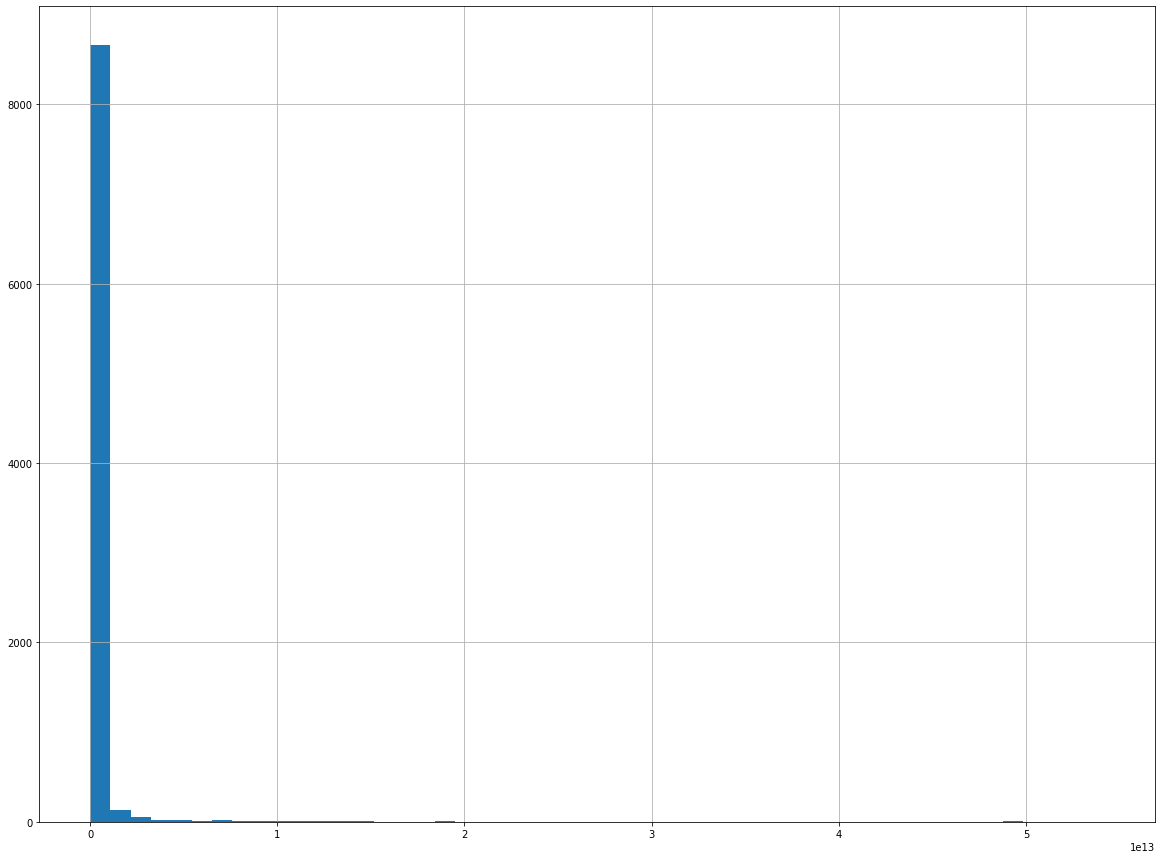

In [73]:
conflict_train3["GDP__current_US__"].hist(bins=50, figsize=(20,15)) 
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A4072FD48>,
      dtype=object)

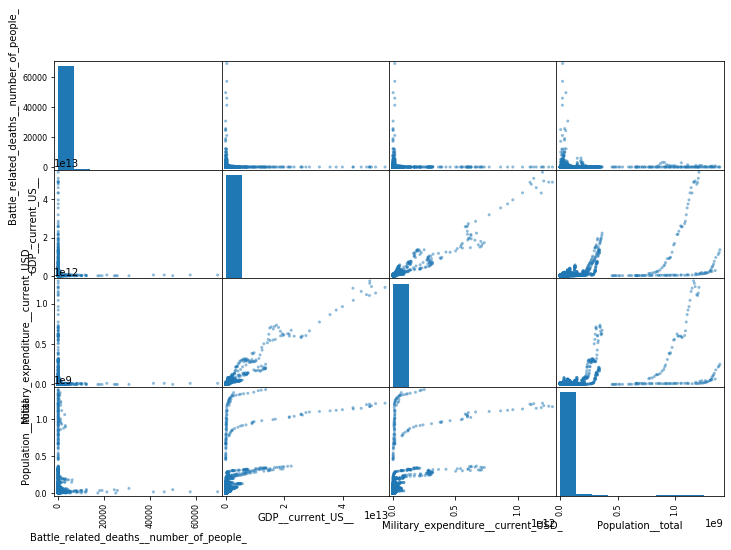

In [74]:
attributes = ["Battle_related_deaths__number_of_people_", "GDP__current_US__", "Military_expenditure__current_USD_","Population__total"] 
scatter_matrix(conflict_train3[attributes], figsize=(12, 8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A42FBA908>,
      dtype=object)

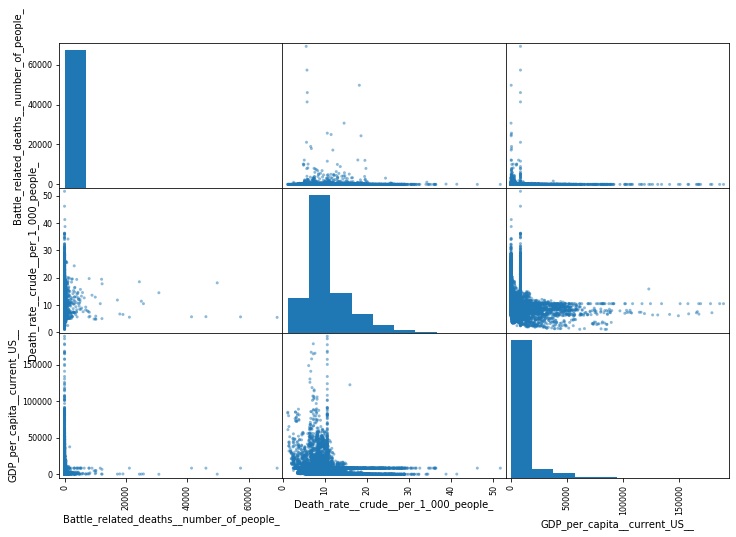

In [75]:
attributes2 = ["Battle_related_deaths__number_of_people_", "Death_rate__crude__per_1_000_people_", "GDP_per_capita__current_US__"] 
scatter_matrix(conflict_train3[attributes2], figsize=(12, 8))

In [76]:
%matplotlib inline  
import matplotlib.pyplot as plt

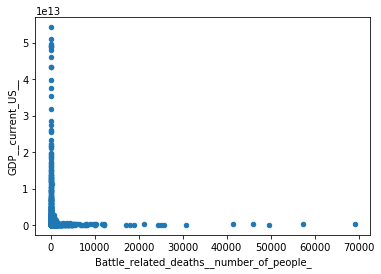

In [77]:
conflict_train3.plot(kind="scatter", x="Battle_related_deaths__number_of_people_", y="GDP__current_US__")
plt.show()

# Step 6: Apply transformations and visualize. 

In [78]:
print(conflict_train3[["GDP__current_US__"]].var())

GDP__current_US__    5.071806e+24
dtype: float64


In [79]:
conflict_train3["gdp_log"] = np.log(conflict_train3["GDP__current_US__"])

In [80]:
print(conflict_train3[["Battle_related_deaths__number_of_people_"]].var())

Battle_related_deaths__number_of_people_    2.358173e+06
dtype: float64


In [81]:
conflict_train3["brdeaths_log"] = np.log(conflict_train3["Battle_related_deaths__number_of_people_"])

C:\Python\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


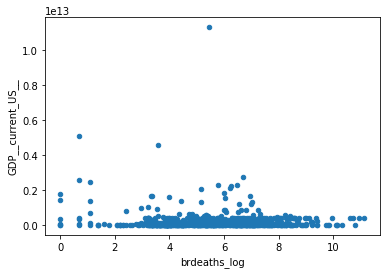

In [82]:
conflict_train3.plot(kind="scatter", x="brdeaths_log", y="GDP__current_US__")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A43DF4188>,
      dtype=object)

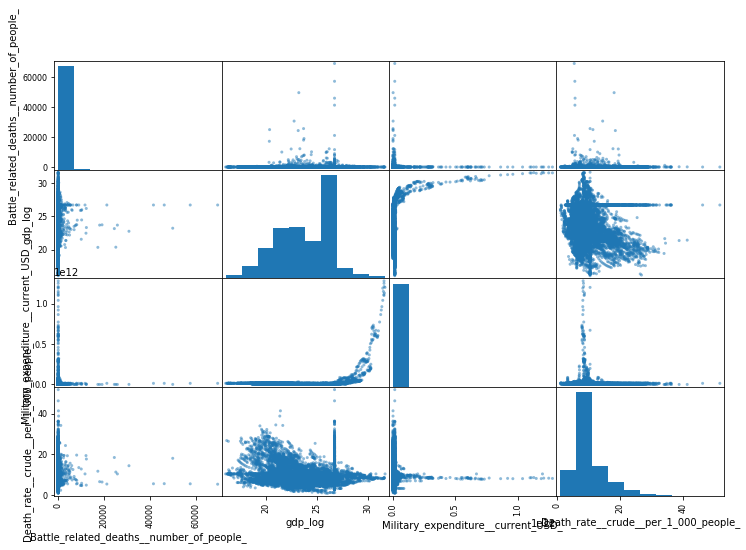

In [84]:
attributesX = ["Battle_related_deaths__number_of_people_", "gdp_log", "Military_expenditure__current_USD_",             
              "Death_rate__crude__per_1_000_people_"] 
scatter_matrix(conflict_train3[attributesX], figsize=(12, 8))

In [85]:
corr_matrix = conflict_train3.corr()

In [86]:
 corr_matrix["Battle_related_deaths__number_of_people_"].sort_values(ascending=False)

Battle_related_deaths__number_of_people_                 1.000000
brdeaths_log                                             0.515903
Syrian Arab Republic                                     0.253381
Afghanistan                                              0.172926
Ethiopia                                                 0.118631
                                                           ...   
1963                                                    -0.010439
1981                                                    -0.010472
Population_density__people_per_sq__km_of_land_area_     -0.011285
GDP_per_capita__current_US__                            -0.025537
Adjusted_net_national_income_per_capita__current_US__   -0.029146
Name: Battle_related_deaths__number_of_people_, Length: 296, dtype: float64

In [ ]:
# "GDP__current_US__"
plt.hist(conflict_train3["GDP__current_US__"].values.reshape(-1, 1))
plt.show()

In [ ]:
plt.hist(conflict_train3["GDP__current_US__"].values.reshape(-1, 1)**3, bins=10)
plt.show()

In [ ]:
# Battle related deaths
plt.hist(conflict_train3["Battle_related_deaths__number_of_people_"].values.reshape(-1, 1)**2, bins=10)
plt.show()

In [ ]:
# crude death rate
plt.hist(conflict_train3["Death_rate__crude__per_1_000_people_"].values.reshape(-1, 1))
plt.show()

In [ ]:
plt.hist(conflict_train3["Death_rate__crude__per_1_000_people_"].values.reshape(-1, 1)**2, bins=10)
plt.show()

# A first attempt at Project 2, not submitting for a grade

Step 1 and Step 2 completed in Project 1.

# Step 3: Select your target attribute.

I am trying to run models on the continuous dependent variable, Battle related deaths. I can either use the original variable or the logarithmic version of the variable I created in Project 1, Step 6. I've plotted their histograms below. The original variable is neither Gaussian nor uniform but rather left-skewed with a large number of 0s, I will try using the logarithmic Battle related deaths variable for a more normalized distribution. 

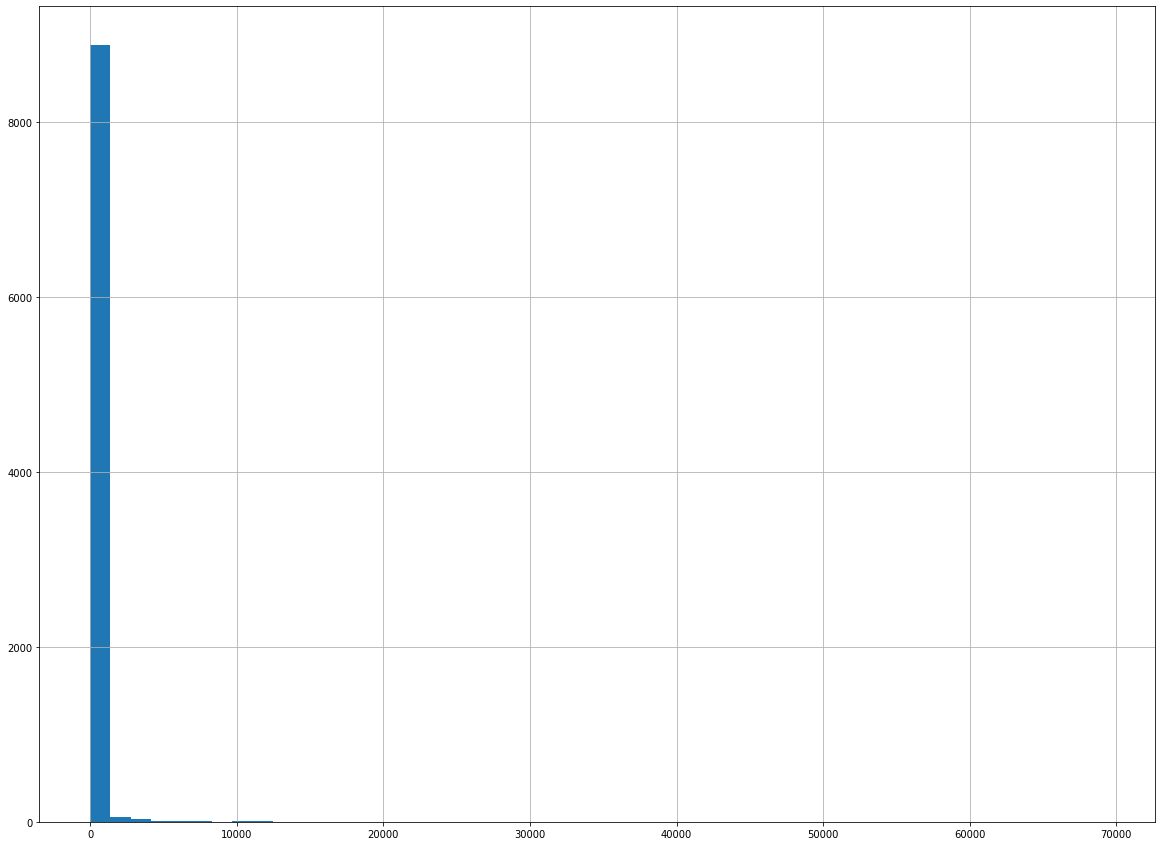

In [87]:
conflict_train3["Battle_related_deaths__number_of_people_"].hist(bins=50, figsize=(20,15)) 
plt.show()

ValueError: supplied range of [-inf, 11.144741690634294] is not finite

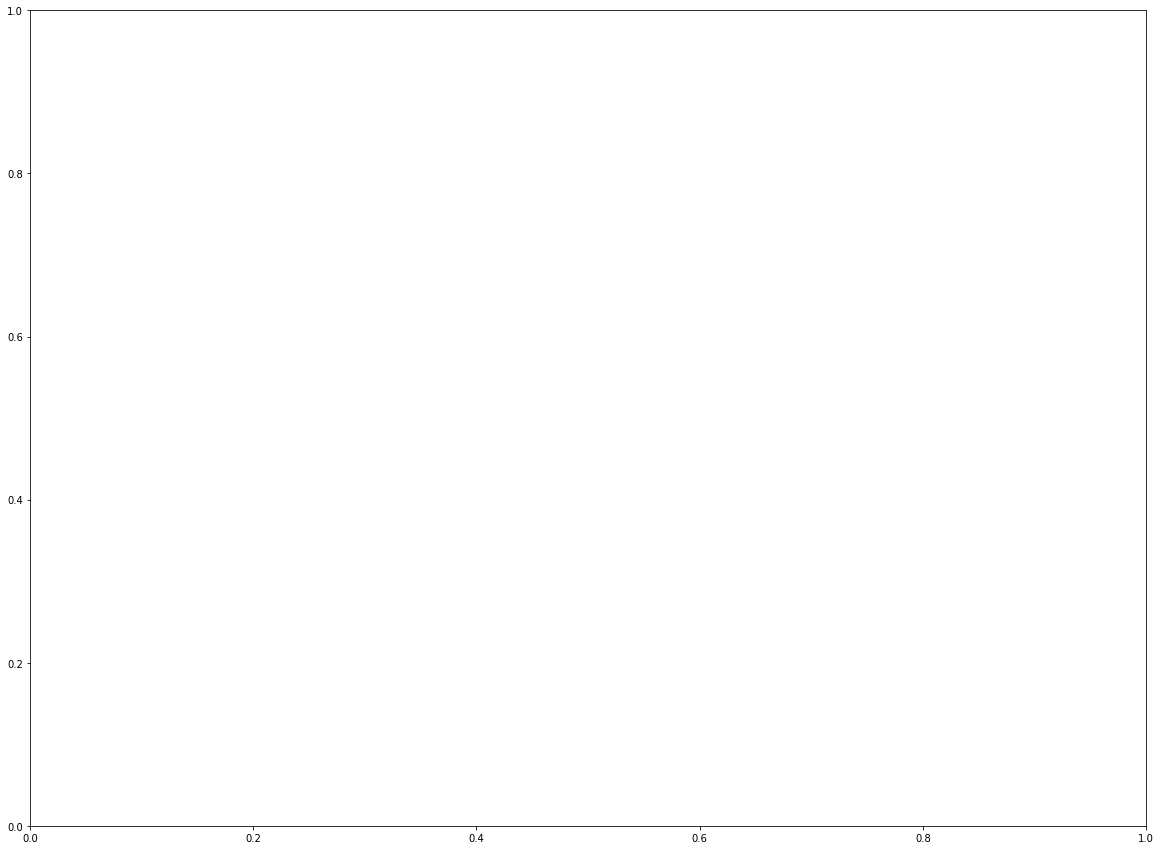

In [90]:
conflict_train3["brdeaths_log"].hist(bins=50, figsize=(20,15)) 
plt.show()

In order to select my target attribute, I need to change my pandas dataframe to a numpy array.

In [91]:
conflicttrainnp = conflict_train3.to_numpy()

In [92]:
conflict_train3.shape

(9004, 296)

In [93]:
conflict_train3.head()

,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,GDP__current_US__,GDP_per_capita__current_US__,Military_expenditure__current_USD_,Population_density__people_per_sq__km_of_land_area_,Population__total,Rural_population,Urban_population,Battle_related_deaths__number_of_people_,gdp_log,brdeaths_log
0,0,0,0,0,0,0,0,0,0,0,...,3.951974e+11,8508.160296,1.398647e+10,50.090763,3139689.0,1583816.0,1555873.0,0.0,26.702651,-inf
1,0,0,0,0,0,0,0,0,0,0,...,4.274533e+10,12230.073450,9.890338e+08,13.273708,3495100.0,526013.0,2969087.0,0.0,24.478526,-inf
2,0,0,0,0,0,0,0,0,0,0,...,1.370000e+11,205.693386,3.975819e+09,224.506273,667499806.0,518120024.0,149379782.0,0.0,25.643247,-inf
3,0,0,0,0,0,0,0,0,0,0,...,3.068911e+08,908.096190,1.398647e+10,83.858561,337950.0,188846.0,149104.0,0.0,19.542004,-inf
4,0,0,0,0,0,0,0,0,0,0,...,3.115284e+10,3390.545484,1.559887e+09,71.281226,9188150.0,2992672.0,6195478.0,0.0,24.162171,-inf


In [94]:
X_train = conflicttrainnp[:, 0:294]

In [113]:
X_train.shape

(9004, 294)

In [95]:
y_train = conflicttrainnp[:, 294]

In [114]:
y_train.shape

(9004,)

In [96]:
conflicttestnp = conflict_test3.to_numpy()

In [134]:
X_test = conflicttestnp[:, 0:294]

In [135]:
X_test.shape

(4436, 294)

In [142]:
y_test = conflicttestnp[:, 293]

In [143]:
y_test.shape

(4436,)

# Step 4a: Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
lr = LinearRegression().fit(X_train, y_train)

In [145]:
print("lr.coef_: {}".format(lr.coef_)) 
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [-6.99602772e-01 -1.04896669e+00 -8.03634091e-01  1.38061430e-01
 -3.28567933e+00  1.56587204e-01 -3.03792070e+00 -1.53041948e-01
 -6.07583926e-01 -1.64519371e+00 -5.19980481e-01 -1.07004682e+00
  3.77389296e-02 -4.13795645e+00 -1.61973040e+00 -5.59428357e-01
 -2.27619211e+00  5.08567910e-01 -6.63682625e-01 -5.23462188e+00
 -2.94991821e+00 -3.99328113e+00 -1.67512293e+00 -2.06815717e+00
  7.22960880e-02 -3.92321661e+00  5.91954891e-02  1.52249713e+00
 -3.40555894e+00  2.37976970e-02 -2.64916288e+00 -3.71556882e+00
 -2.97817060e+00 -1.08734353e+00 -1.47070498e+00 -2.30545304e-01
 -1.43230547e+00  4.03543245e-01 -3.48771471e+00  1.25717455e+00
 -2.86859493e+00  7.47181610e-01 -1.11227173e+00 -1.43508235e+00
 -5.80832349e-01 -2.03621244e+00 -1.45841134e+00 -2.99457602e+00
 -2.57703897e+00 -1.71248638e+00  5.28191995e-01 -2.71144347e-01
  1.33732252e+00 -2.02917809e+00  7.64123589e-01 -1.25248810e+00
 -1.89866471e+00 -3.54208652e+00 -2.09616244e+00 -1.81521476e+00
 -3.18112652e-0

# Step 5a: Linear Regression Tuning Parameters

In [159]:
y_pred = lr.predict(X_test)

In [147]:
lr.score(X_test, y_test)

-0.0033826186125955893

In [148]:
print("Training set score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(lr.score(X_test, y_test)))

Training set score: 0.60
Test set score: -0.00


I am laughing! I can't tell if I identified the target incorrectly, if I ran the regression incorrectly, or if the test really just does that poorly.

In [157]:
from sklearn import metrics

In [160]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 98.85008617095971
Mean Squared Error: 857157.5891869904
Root Mean Squared Error: 925.8280559515306


INTERPRET THESE RESULTS

Because linear regression has the tendency to overfit to complex datasets (high dimensional aka having many features), can add regularization by doing a ridge regression

In [161]:
from sklearn.linear_model import Ridge

In [162]:
ridge = Ridge().fit(X_train, y_train) 

C:\Python\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.99434e-29): result may not be accurate.
  overwrite_a=True).T


In [164]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.62
Test set score: -0.00


Experimenting with alpha - high alpha forces coefficients towards 0 and increases regularization. 

In [165]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train) 

C:\Python\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.78711e-28): result may not be accurate.
  overwrite_a=True).T


In [166]:
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.60
Test set score: -0.00


Almost no regularization with such a low alpha, should be very similar to the regular linear regression in 4a

In [167]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train) 

C:\Python\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12053e-30): result may not be accurate.
  overwrite_a=True).T


In [168]:
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.62
Test set score: -0.00


Lasso attempt! Seeing which features are deemed most important and exploring L1 regularization/error

In [169]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.23
Test set score: -0.00
Number of features used: 9


C:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27375.660805594325, tolerance: 7.11804789055735
  positive)


In [170]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.34
Test set score: -0.00
Number of features used: 48


In [171]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.62
Test set score: -0.00
Number of features used: 292


C:\Python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13856.608035360909, tolerance: 7.11804789055735
  positive)


# Step 4b: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(max_depth=3).fit(Xreg_train, yreg_train)

# Step 5b: Decision Tree Tuning Parameters and Forest Exploration!

In [ ]:
print("Decision Tree R^2: {:.2f}".format(tree.score(Xreg_test, yreg_test)))

In [ ]:
print("Decision Tree RMSE: {:.2f}".format(mean_squared_error(yreg_test, tree.predict(Xreg_test))))

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

before moving on to random forests, play with max_depth

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor(n_estimators=5, random_state=2) forest.fit(X_train, y_train) 

In [ ]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

play with max_features: a high max_features means that the trees in the random forest will be quite similar, and they will be able to fit the data easily, using the most distinctive features. A low max_features means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well. 

play with max_depth, n_estimators, and max_features

Gradient boosted regression trees!

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(n_estimators=100, random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

In [ ]:
gbrt1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt1.score(X_test, y_test)))

In [ ]:
gbrt2 = GradientBoostingClassifier(n_estimators=10,random_state=0, learning_rate=0.9)
gbrt2.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt2.score(X_test, y_test)))

In [ ]:
plot_feature_importances_cancer(gbrt)